# Checkpoint Objective
This project requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES: Amount of purchases made from account 

ONEOFF_PURCHASES: Maximum purchase amount done in one-go

 INSTALLMENTS_PURCHASES: Amount of purchase done in installment

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

#### 1. Load your dataset.

In [2]:
dt = pd.read_csv('23.CC_GENERAL_AmaniYch.csv')
dt

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Data preprocessing

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Check missing values
dt.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Get info on the columns with missing vlues
dt[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
count,8949.000000,8637.000000
mean,4494.449450,864.206542
std,3638.815725,2372.446607
min,50.000000,0.019163
25%,1600.000000,169.123707
50%,3000.000000,312.343947
75%,6500.000000,825.485459
max,30000.000000,76406.207520


In [6]:
# Replace the missing values with the appropriate values
dt['CREDIT_LIMIT'] = dt['CREDIT_LIMIT'].fillna(dt['CREDIT_LIMIT'].mean())
dt['MINIMUM_PAYMENTS'] = dt['MINIMUM_PAYMENTS'].fillna(dt['MINIMUM_PAYMENTS'].median())

In [7]:
# Check for duplicates
dt.duplicated().sum()

0

In [8]:
# Drop the CUST_ID column as it is an identifier and not useful for clustering
dt.drop("CUST_ID", axis=1, inplace=True)

In [9]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dt)

# Convert scaled_data back to a DataFrame
scaled_dt = pd.DataFrame(scaled_data, columns=dt.columns)

#### 2. Use hierarchical clustering to identify the inherent groupings within your data.

#### Plot the dendrogram

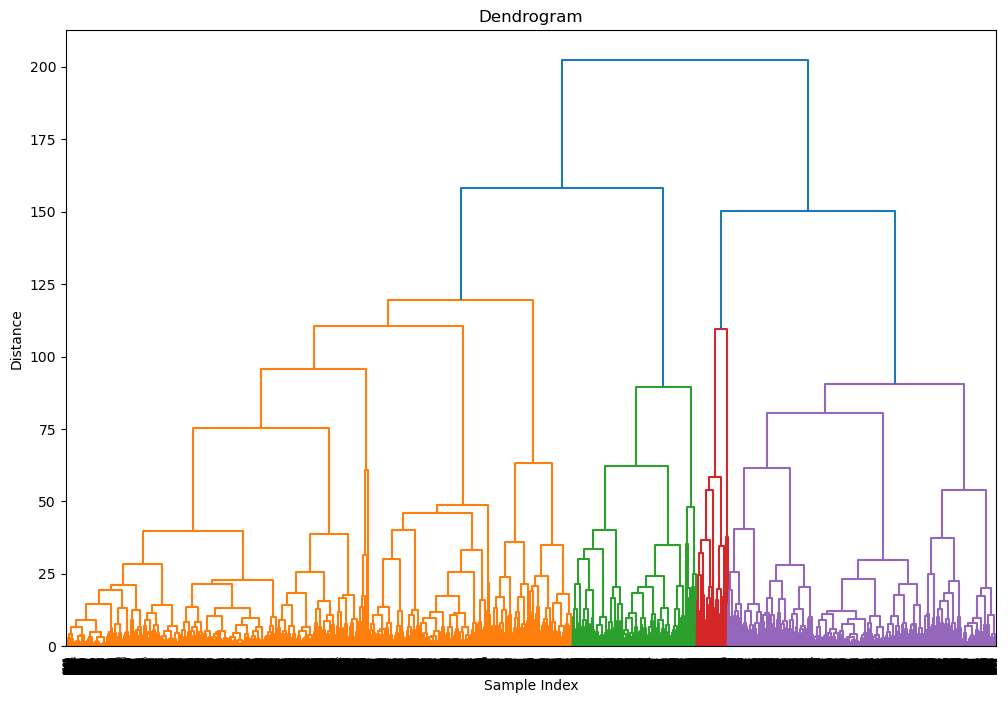

In [10]:
# Perform hierarchical clustering
linked = linkage(scaled_dt, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [11]:
# Apply the model
ac = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
clust_ac = ac.fit_predict(scaled_dt)

#### 3. Plot the clusters. 

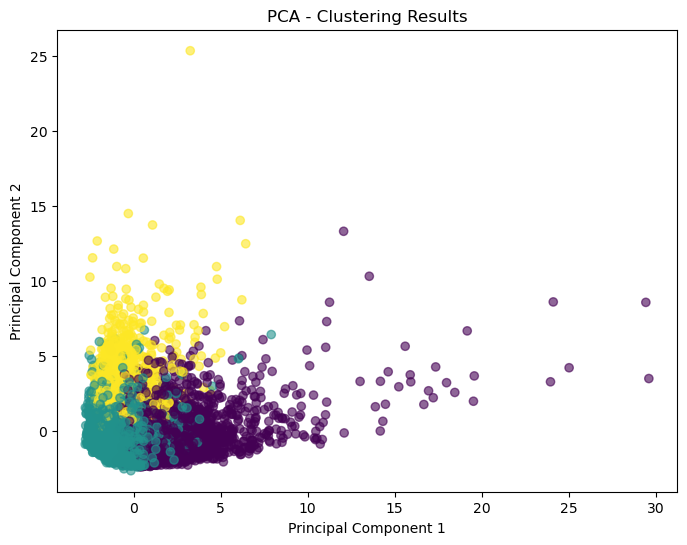

In [12]:
# We're going to use PCA in order to reduce the dimension of features to 2D for better visualizations
# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_lc = pca.fit_transform(scaled_dt)

# Visualize the clustered data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_lc[:, 0], pca_lc[:, 1], c=clust_ac, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Clustering Results")
plt.show()


#### 4. Use k-means clustering. 

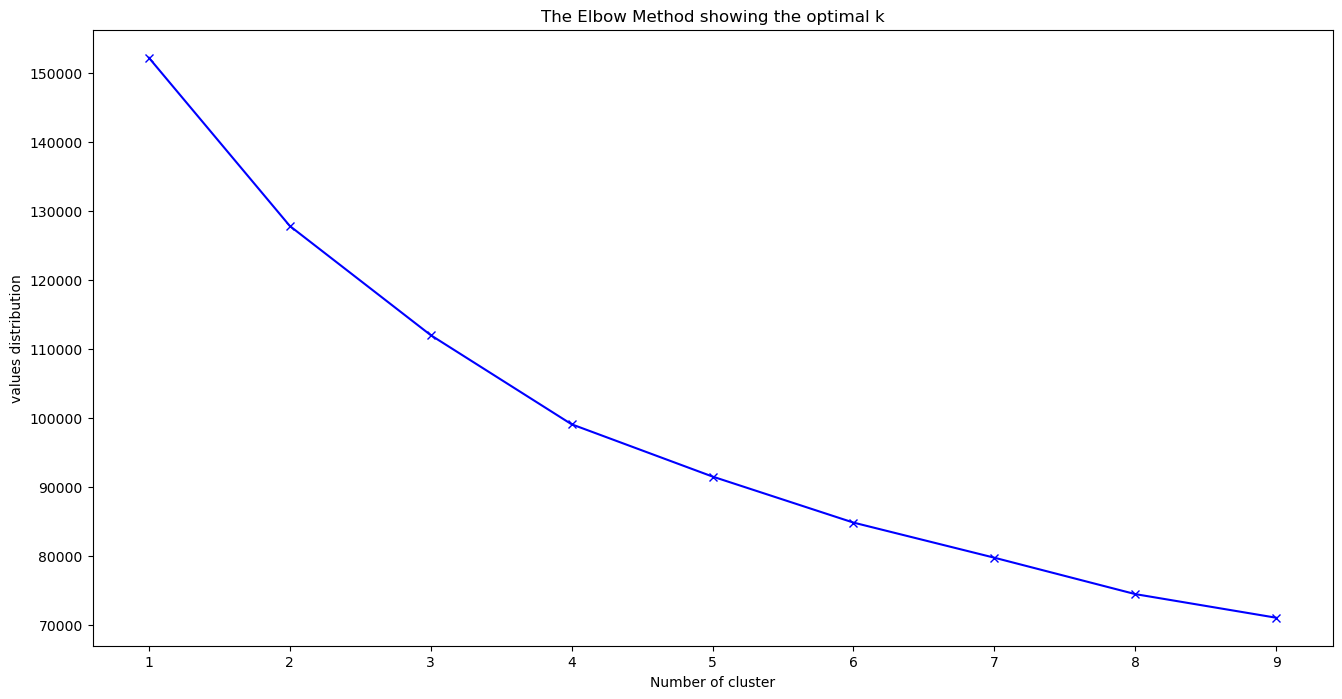

In [13]:
# Elbow method for optimal k
kMeansTab = []
ran = range(1, 10)
for k in ran:
    kmeanModel = KMeans(n_clusters = k, n_init=10)
    kmeanModel.fit(scaled_dt)
    kMeansTab.append(kmeanModel.inertia_)
    
#Plotting K-Means
plt.figure(figsize = (16,8))
plt.plot(ran, kMeansTab, 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('values distribution')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
# kmeans classification with 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 123, n_init=10) 
kmeans.fit(scaled_dt)                                           
clust_km = pd.Series(kmeans.labels_)
print(f'silhouette score: {silhouette_score(scaled_dt, kmeans.labels_)}')

silhouette score: 0.19767817470513593


#### 5. Try different k values and select the best one. 

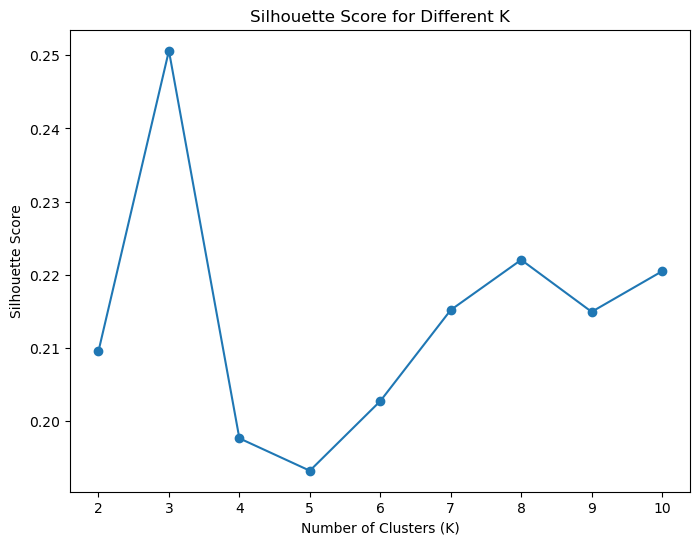

In [15]:
# Try different k values and select the best one using silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_dt)
    silhouette_scores.append(silhouette_score(scaled_dt, kmeans.labels_))

# Plot the silhouette scores to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

In [16]:
# Based on the silhouette scores, we choose K = 3 as the optimal number of clusters
kmeans = KMeans(n_clusters = 3, random_state = 123, n_init=10) 
kmeans.fit(scaled_dt)                                           
clust_km_sil = pd.Series(kmeans.labels_)
print(f'silhouette score: {silhouette_score(scaled_dt, kmeans.labels_)}')

silhouette score: 0.25061806557397215


In [17]:
# When comparing the silhouette score for n_clusters = 3 and n_clusters = 4, the first choice is better eventhough the clusters overlap

#### 6. Plot the clusters. 

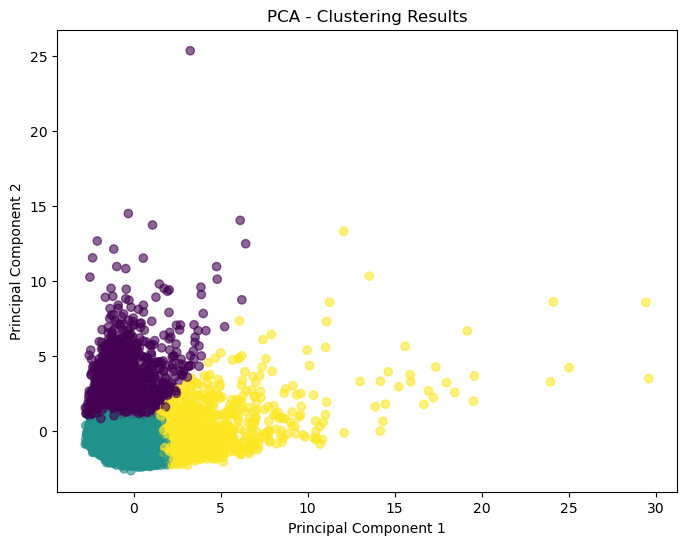

In [18]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_km_sil = pca.fit_transform(scaled_dt)

# Visualize the clustered data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_km_sil[:, 0], pca_km_sil[:, 1], c=clust_km_sil, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Clustering Results")
plt.show()


#### 7. Compare the two results. 

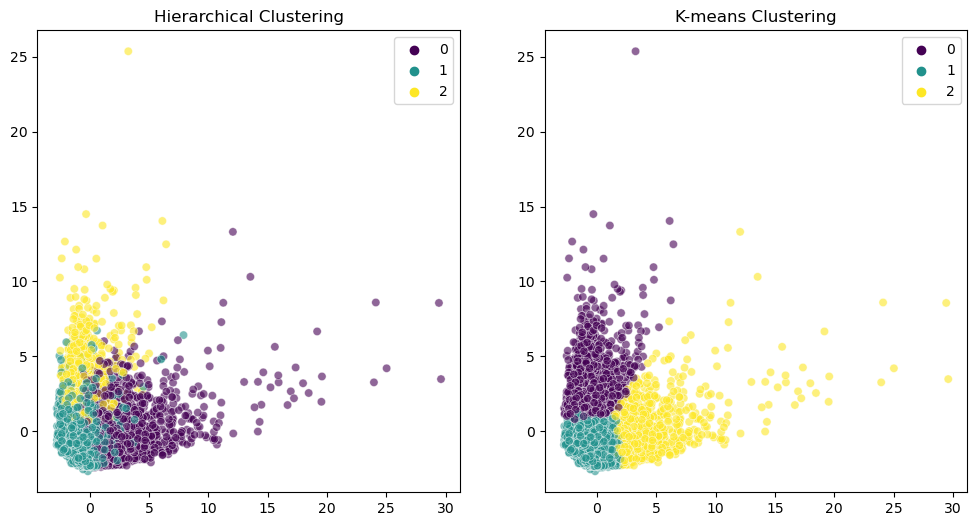

In [19]:
# Compare the two results
plt.figure(figsize=(12, 6))

# Subplot for Hierarchical clustering result
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_lc[:, 0], y=pca_lc[:, 1], hue=clust_ac, data=scaled_dt, palette="viridis", alpha=0.6)
plt.title("Hierarchical Clustering")

# Subplot for K-means clustering result
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_km_sil[:, 0], y=pca_km_sil[:, 1], hue=clust_km_sil, data=scaled_dt, palette="viridis", alpha=0.6)
plt.title("K-means Clustering")

plt.show()

In [20]:
# Kmeans clustering gave better results than the agglomerative clustering

#### Bonus: search for another validation metric

In [21]:
# We used silhouette score above